In [ ]:
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.*
!pip install stable-baselines3[extra]
#!pip install stable-baselines[mpi]
!pip install gym --upgrade
!pip install gym[box2d]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.23.1
    Uninstalling gym-0.23.1:
      Successfully uninstalled gym-0.23.1
  Using cached gym-0.23.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.5.0 requires gym==0.21, but you have gym 0.23.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gym
from stable_baselines3 import PPO
from stable_baselines3 import A2C
#from stable_baselines import TRPO

from stable_baselines3.common.env_util import make_vec_env
import imageio
import os
import numpy as np

# Parallel environments
env = make_vec_env("CarRacing-v1", n_envs=4)
#del model  # delete trained model to demonstrate loading
#model = A2C.load("/content/drive/MyDrive/A2C",env=env)
model = A2C("CnnPolicy", env, learning_rate=0.0005, n_steps=1024, gamma=0.9, gae_lambda=0.999,use_rms_prop =False, seed=8,verbose=1)#42.003257751464844
#model = A2C("CnnPolicy", env, learning_rate=0.0003, n_steps=1024, gamma=0.99, gae_lambda=0.95, seed=8,verbose=1)#13.41351318359375
#model = A2C("CnnPolicy", env,seed=8,verbose=1)#12.216592788696289
#model = A2C("CnnPolicy", env, learning_rate=0.0003, n_steps=1024, gamma=0.99, gae_lambda=0.95,use_rms_prop =False, seed=8,verbose=1)#34.76980209350586

#model.set_env(env)
model.learn(total_timesteps=25000)
#model.save('/content/drive/MyDrive/A2C')


Using cpu device
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.7/dist-packages/gym/core.py:173: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


Track generation: 957..1209 -> 252-tiles track
Track generation: 1127..1413 -> 286-tiles track
Track generation: 1191..1493 -> 302-tiles track
Track generation: 993..1253 -> 260-tiles track
Track generation: 1196..1499 -> 303-tiles track
Track generation: 1364..1709 -> 345-tiles track
Track generation: 1180..1479 -> 299-tiles track
Track generation: 988..1242 -> 254-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1121..1414 -> 293-tiles track
Track generation: 1034..1297 -> 263-tiles track
Track generation: 1120..1404 -> 284-tiles track
Track generation: 1147..1438 -> 291-tiles track
Track generation: 1145..1440 -> 295-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1187..1488 -> 301-tiles track
Track generation: 1165..1461 -> 296-tiles track
Track generation: 1069..1340 -> 271-tiles track
Track generation: 1023..1283 -> 260-tiles track
Track generation: 1159..145

In [ ]:
#Validation
from tqdm import tqdm
obs = env.reset()
frames = []
rewards=[]
for i in tqdm(range(1000)):
  action, _states = model.predict(obs.copy(), deterministic=True)
  obs, reward, done, info = env.step(action)
  rewards.append(reward)
  frames.append(env.render("rgb_array"))
  if done.all():
    obs = env.reset()
    break

env.close()

path = os.path.join(f"eval.mp4")
frames = np.array(frames)
imageio.mimsave(path, frames, fps=30)

Track generation: 1263..1584 -> 321-tiles track
Track generation: 1184..1484 -> 300-tiles track
Track generation: 1146..1436 -> 290-tiles track
Track generation: 1123..1408 -> 285-tiles track


 27%|██▋       | 274/1000 [01:04<02:50,  4.26it/s]

Track generation: 1260..1579 -> 319-tiles track
Track generation: 1183..1483 -> 300-tiles track


 28%|██▊       | 275/1000 [01:04<03:02,  3.98it/s]

Track generation: 1017..1284 -> 267-tiles track
Track generation: 1176..1474 -> 298-tiles track


 55%|█████▍    | 549/1000 [02:09<01:53,  3.97it/s]

Track generation: 1116..1399 -> 283-tiles track
Track generation: 1087..1365 -> 278-tiles track


 55%|█████▌    | 552/1000 [02:10<01:51,  4.02it/s]

Track generation: 1156..1455 -> 299-tiles track


 82%|████████▏ | 823/1000 [03:12<00:38,  4.58it/s]

Track generation: 1022..1290 -> 268-tiles track


 82%|████████▎ | 825/1000 [03:12<00:37,  4.64it/s]

Track generation: 1109..1392 -> 283-tiles track


100%|██████████| 1000/1000 [03:49<00:00,  4.35it/s]
/usr/local/lib/python3.7/dist-packages/imageio/plugins/ffmpeg.py:727: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(im.tostring())


In [ ]:
rewardLS=[]
for i,r in enumerate(rewards):
  rewardLS.append(r.mean())

In [ ]:
rewards[:10]

[array([6.15     , 6.588963 , 6.820415 , 6.9422536], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32),
 array([-0.1, -0.1, -0.1, -0.1], dtype=float32)]

In [ ]:
rewardLS[:10]

[6.6254077, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecati

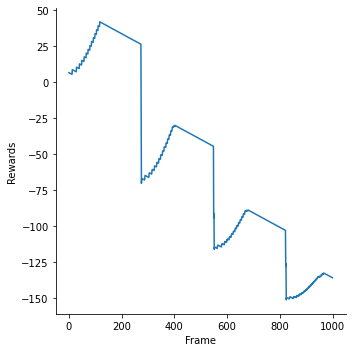

In [ ]:
rewards_data = {'Frame': np.arange(len(rewardLS)), 'Rewards':np.array(rewardLS).cumsum()}
rewards_data = pd.DataFrame(data=rewards_data)
sns.relplot(data=rewards_data, x="Frame", y="Rewards", kind="line")
plt.savefig('rewards_graph.png')

In [ ]:
max(rewards_data.Rewards)#24.752187728881836 with 250k timesteps

42.003257751464844